# AVACADO CASE STUDY:Evaluation_PROJECT_2

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. 
Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set.
Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) 
are sold in bags.The Product Lookup codes (PLU’s) in the table are only for Hass avocados.
Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•Date - The date of the observation

•AveragePrice - the average price of a single avocado

•type - conventional or organic

•year - the year

•Region - the city or region of the observation

•Total Volume - Total number of avocados sold

•4046 - Total number of avocados with PLU 4046 sold

•4225 - Total number of avocados with PLU 4225 sold

•4770 - Total number of avocados with PLU 4770 sold

Target variable:Average price is our target/dependent variable here.

Inspiration /Label: 
The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression


In [1]:
#loading the required libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
#loading the dataset
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Obseravtion:
1.There are 18249 rows and 14 columns.    

2.We can see unnamed column in the dataset which is irrelevant so will be deleting.

3.As the data is continuous in the target column,so this will be Regression category.

4.We can see categorical columns which need to be converted into numerical through encoder.

5.We can see date and year column which is redundant in the dataset,so we will split into month,day from date column.

In [4]:
df.shape  #thus shows 18249 rows and 14 columns

(18249, 14)

In [5]:
#We will drop the serial number which is irrelevant column for prediction
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
df.head() #shows first five data and also unammed columns is dropped.

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.tail() #shows last 5 rows of the dataset 

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
df.dtypes #shows the data types of each variables

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We can see there are 9 float datatypes cloumns,3 object datatypes column and 1 int datatype column.

In [9]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values present in the dataset.we neednot to apply imputation technique

<AxesSubplot:>

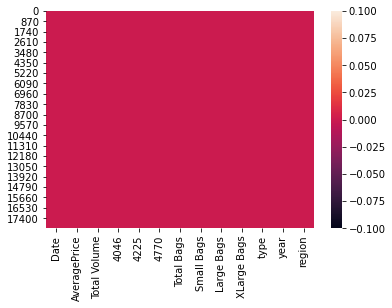

In [10]:
sns.heatmap(df.isnull()) #visual representation of no missing value present

In [11]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


Thus we have split the date column into day ,month and year and remove the date and year column.

In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  region        18249 non-null  object 
 11  Year          18249 non-null  object 
 12  Month         18249 non-null  object 
 13  Day           18249 non-null  object 
dtypes: float64(9), object(5)
memory usage: 1.9+ MB


Thus we see that after spliting the date column,day ,month and year has become object datatype so converting into int datatype as the datas' are numeric.

In [13]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [14]:
#validating datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  region        18249 non-null  object 
 11  Year          18249 non-null  int32  
 12  Month         18249 non-null  int32  
 13  Day           18249 non-null  int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 1.7+ MB


Thus Day,month,year has been changed to int datatypes

# Data Visualization

Univariate Analysis

univariate analysis using distplot to see whether they are normally distributed or skewness presen

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

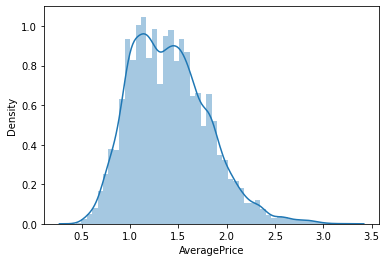

In [15]:
sns.distplot(df['AveragePrice']) 

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

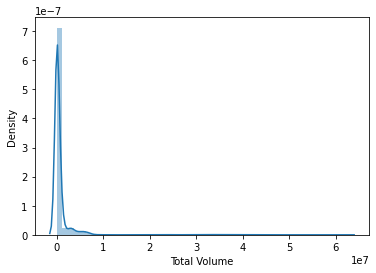

In [16]:
sns.distplot(df['Total Volume']) 

<AxesSubplot:xlabel='4046', ylabel='Density'>

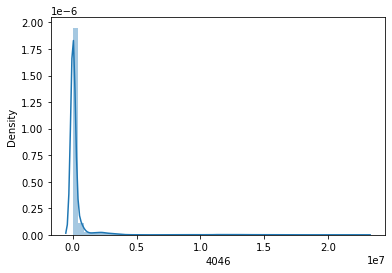

In [17]:
sns.distplot(df['4046']) 

<AxesSubplot:xlabel='4225', ylabel='Density'>

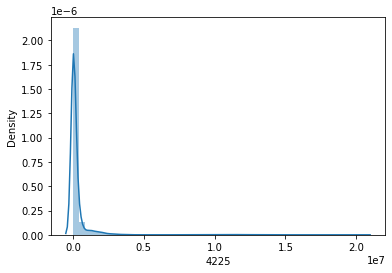

In [18]:
sns.distplot(df['4225']) 

<AxesSubplot:xlabel='4770', ylabel='Density'>

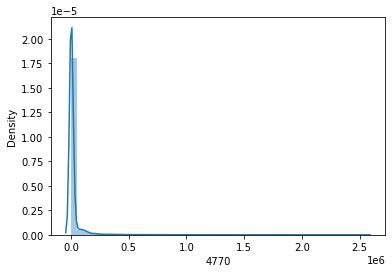

In [19]:
sns.distplot(df['4770']) 

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

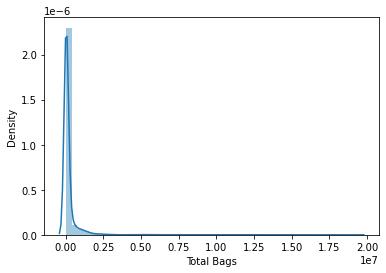

In [20]:
sns.distplot(df['Total Bags']) 

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

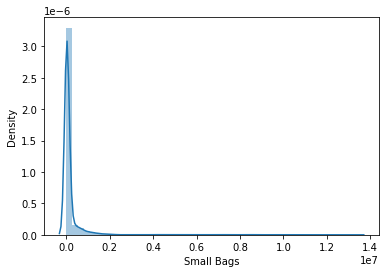

In [21]:
sns.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

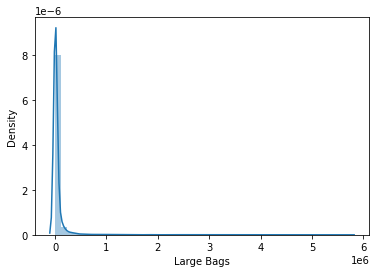

In [22]:
sns.distplot(df['Large Bags']) 

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

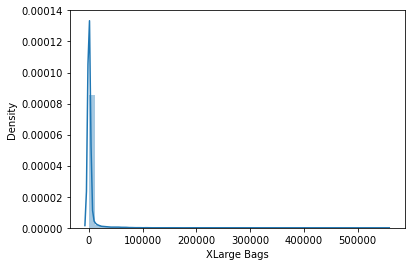

In [23]:
sns.distplot(df['XLarge Bags']) 

<AxesSubplot:xlabel='Year', ylabel='Density'>

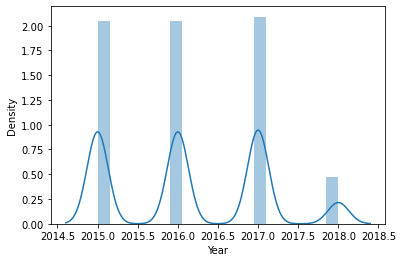

In [24]:
sns.distplot(df['Year']) 

<AxesSubplot:xlabel='Day', ylabel='Density'>

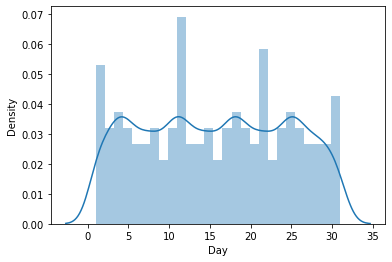

In [25]:
sns.distplot(df['Day']) 

<AxesSubplot:xlabel='Month', ylabel='Density'>

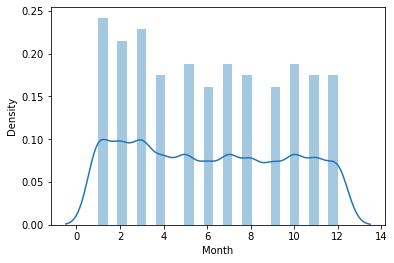

In [26]:
sns.distplot(df['Month']) 

 Thus we see most of the plot there is skewness and not normally distributed which we going to deal later.

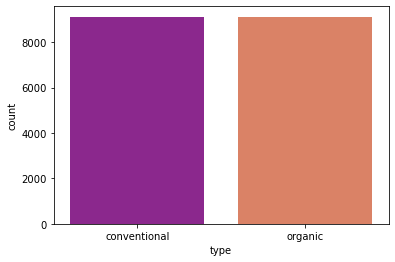

conventional    9126
organic         9123
Name: type, dtype: int64


In [27]:
#Categorical Analysis 
sns.countplot(x='type', data=df, palette="plasma")
plt.show()
print(df['type'].value_counts())  #data are balanced

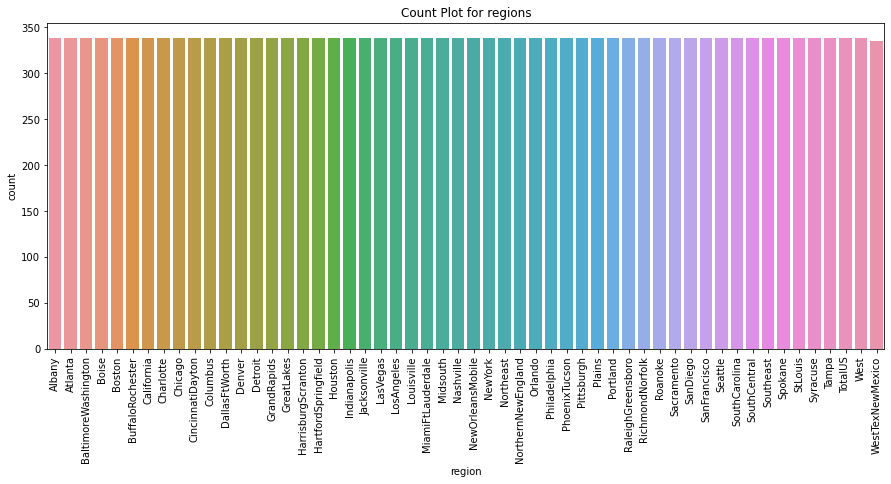

Jacksonville           338
HartfordSpringfield    338
West                   338
SouthCarolina          338
Albany                 338
Denver                 338
SanFrancisco           338
Portland               338
Plains                 338
Pittsburgh             338
Charlotte              338
Chicago                338
Syracuse               338
PhoenixTucson          338
RichmondNorfolk        338
Boston                 338
LosAngeles             338
Tampa                  338
Orlando                338
Columbus               338
Seattle                338
Spokane                338
Roanoke                338
SouthCentral           338
CincinnatiDayton       338
RaleighGreensboro      338
Southeast              338
Detroit                338
NorthernNewEngland     338
TotalUS                338
Philadelphia           338
Boise                  338
BaltimoreWashington    338
BuffaloRochester       338
DallasFtWorth          338
NewYork                338
California             338
S

In [28]:
plt.figure(figsize=(15,6))  #data are almost balanced
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()
print(df['region'].value_counts())

Thus we can see selling of avocados are almost concentrated in all other regions except WestTexNewmexico which is slightly less. 

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


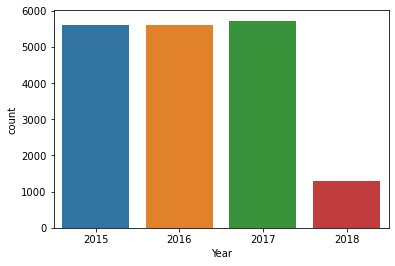

In [29]:
print(df['Year'].value_counts())
sns.countplot(x='Year', data=df)
plt.show()

In the year 2018,selling of avocados was less compare to other years

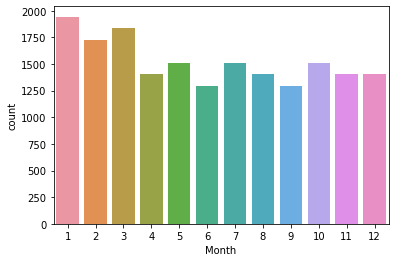

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


In [30]:
sns.countplot(x='Month', data=df)
plt.show()
print(df['Month'].value_counts())

Thus we see selling of avocados was highest in the month of January and least on month of June

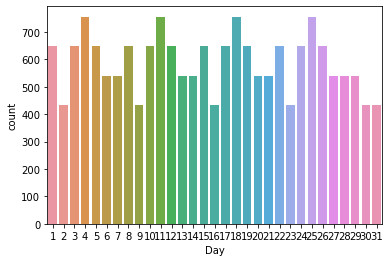

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: Day, dtype: int64


In [31]:
sns.countplot(x='Day', data=df)
plt.show()
print(df['Day'].value_counts())

We see that in "Date" column ,selling of avocado is up and down as highest(days=11,4,18,25) in some days and lowest(days=31,2,23,9) in other days.
So its not constant ,this is according to the demand and supply of avocados.

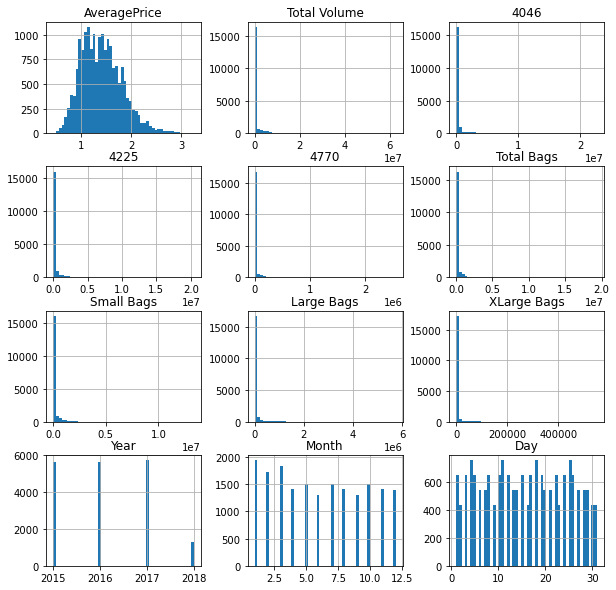

In [32]:
df.hist(figsize=(10,10),bins=50)
plt.show()

Almost all are skewed except Average price which is normally distributed 

# Bivariate analysis

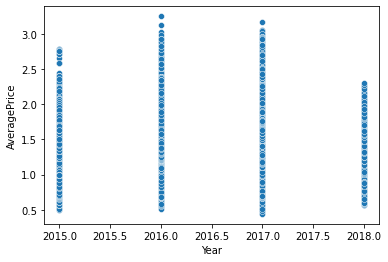

In [33]:
sns.scatterplot(x="Year",y="AveragePrice",data=df); 
                                                        

Thus average price is concentrated with price soaring up and down  along all regions.

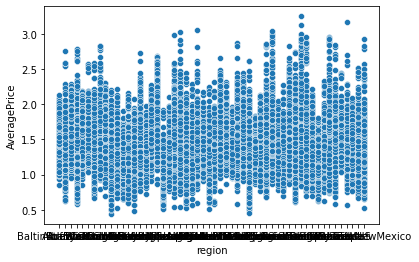

In [34]:
sns.scatterplot(x="region",y="AveragePrice",data=df); 
                                                      

Thus average price is concentrated with price soaring up and down  along all regions.

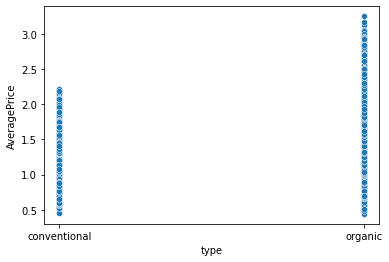

In [35]:
sns.scatterplot(x="type",y="AveragePrice",data=df); 
                                                      

Thus we see that organic avocados are priced higher than conventional ones because organic farming uses biological fertilizers,
implementation of sustainable farming methods such as crop rotation,mixed farming involving more production 
cost compare to conventional ones

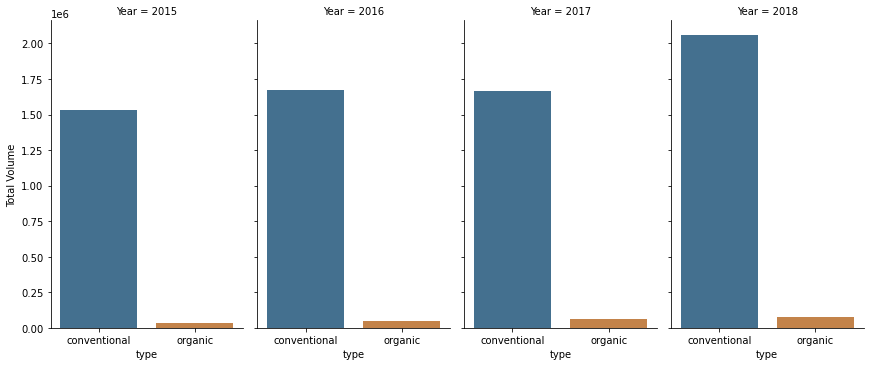

In [36]:
sns.catplot(x="type", y="Total Volume", col="Year",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)
plt.show()

Thus we see that total number of avocado(total volume) sold for conventional for the year 2018 is high compare to other for conventional type.
Conventional types are sold more than organic type as they are cheap where the other is priced high.

<Figure size 1080x720 with 0 Axes>

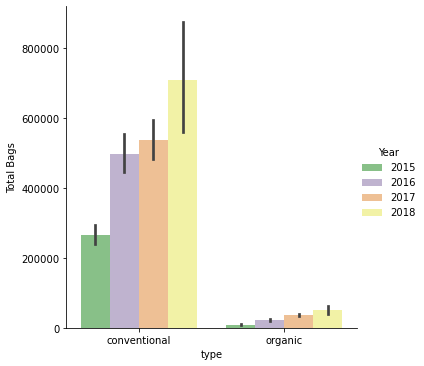

In [37]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="Accent")
plt.show()

The usage of bags are high for conventional type as total number of avocado sold was high sply in year 2018.
Conventional types avocado are prefered more than organic type as they are priced low. 

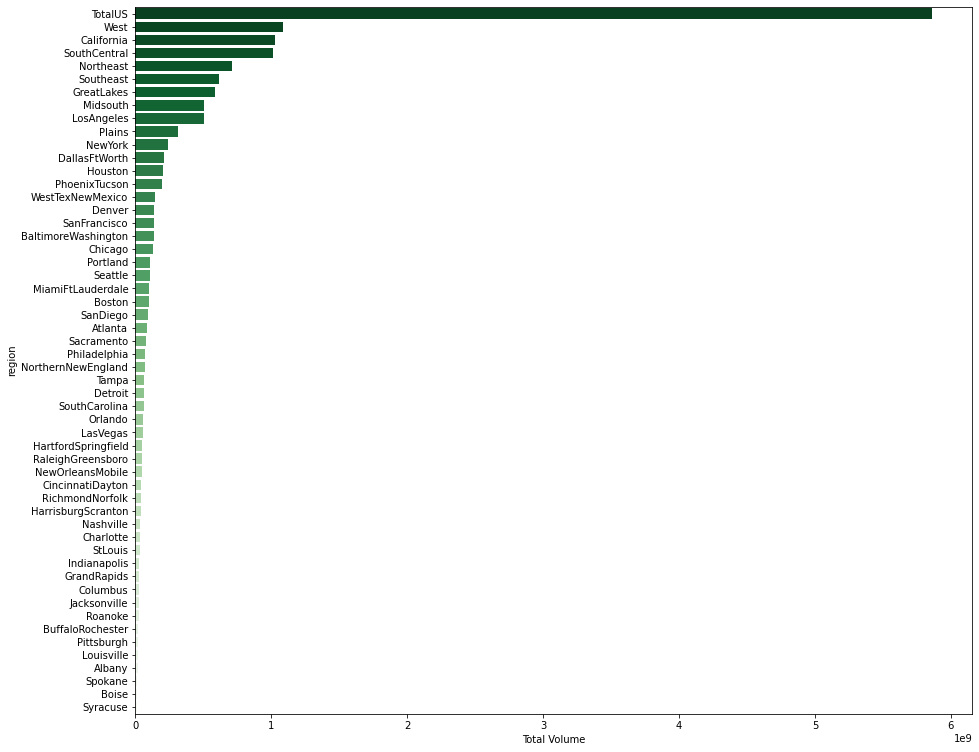

In [38]:
#total avocado sold in each region
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Greens_r")
plt.show()

We can see that more number of avocados were sold in TotalUS region contributed by West,California,South Central,Northeast and 
less number of avocados were sold in regions like Albany, Louisville,Pittsburg etc.

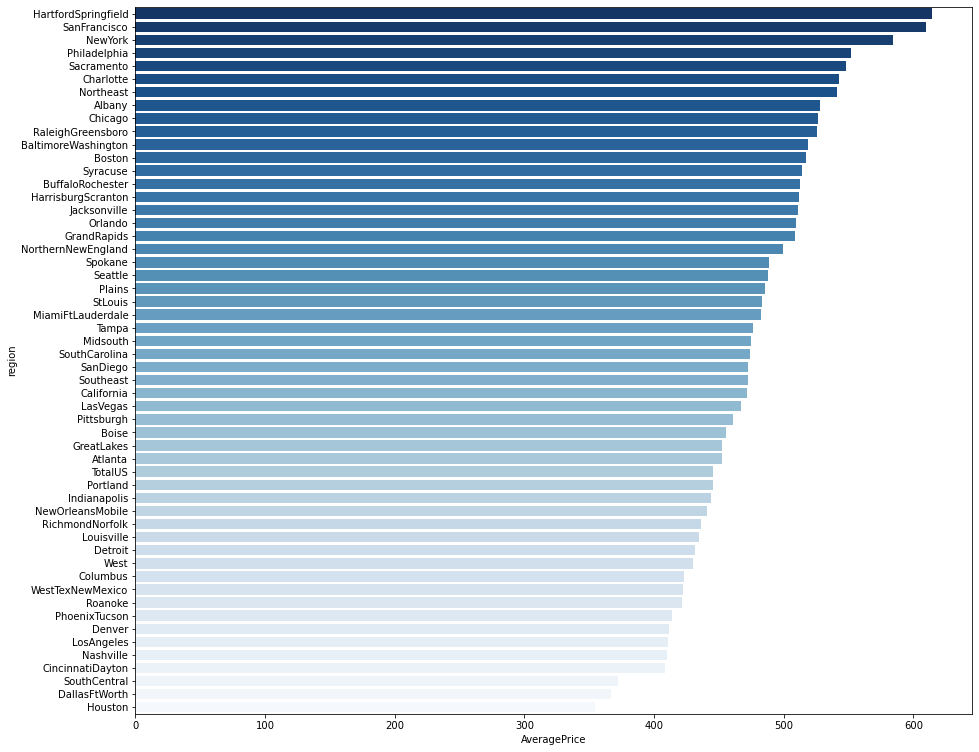

In [39]:
#total avocado sold in each region
region = df.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["AveragePrice"], y=region["region"], data=df, palette="Blues_r")
plt.show()

The average price in HartfordSpringfield is maximum whereas the average price in Houston is minimum

# Multivariate Analysis

In [40]:
df.describe()    #Statistical summary of the dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


observation:
1.There is skewness present in most of the columns.
2.High varinace is there in Large Bags.
3.Outliers are present as there is high gap in between max and 75% percentile

In [41]:
#Checking correlation of the dataset
corr=df.corr()  
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


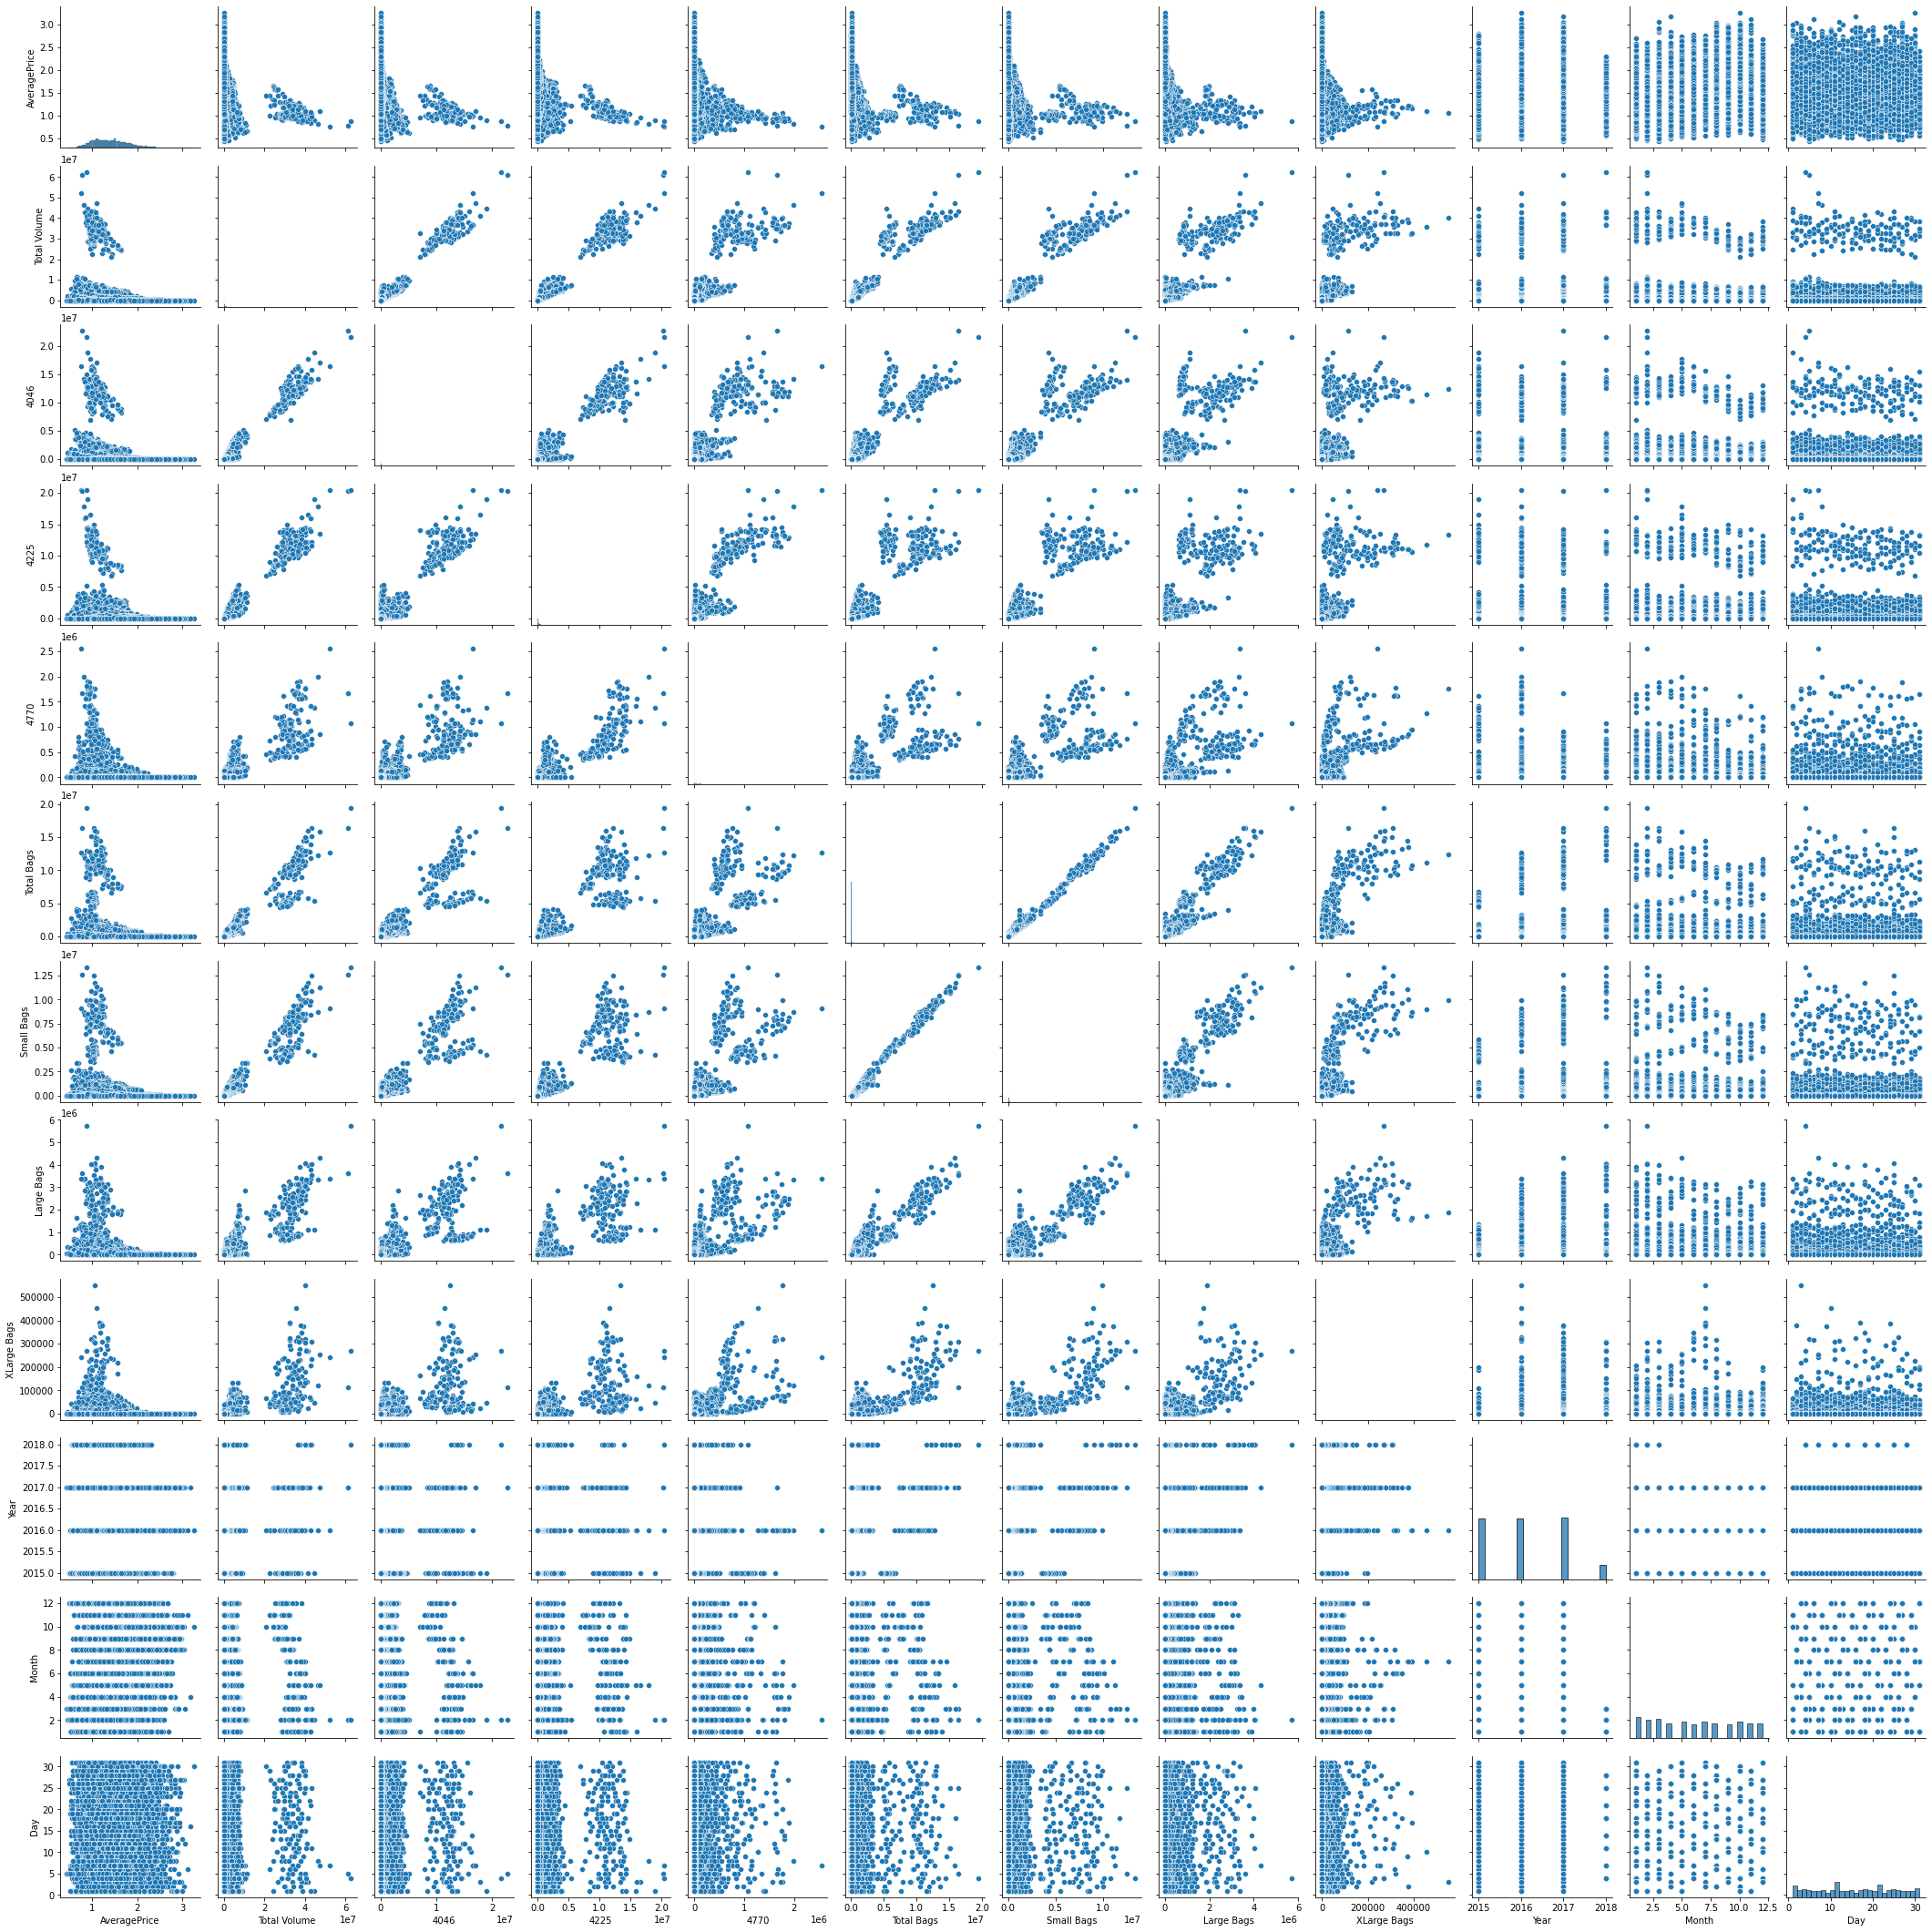

In [42]:
sns.pairplot(df) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

This shows most of the columns are having collinearity among them.

<AxesSubplot:>

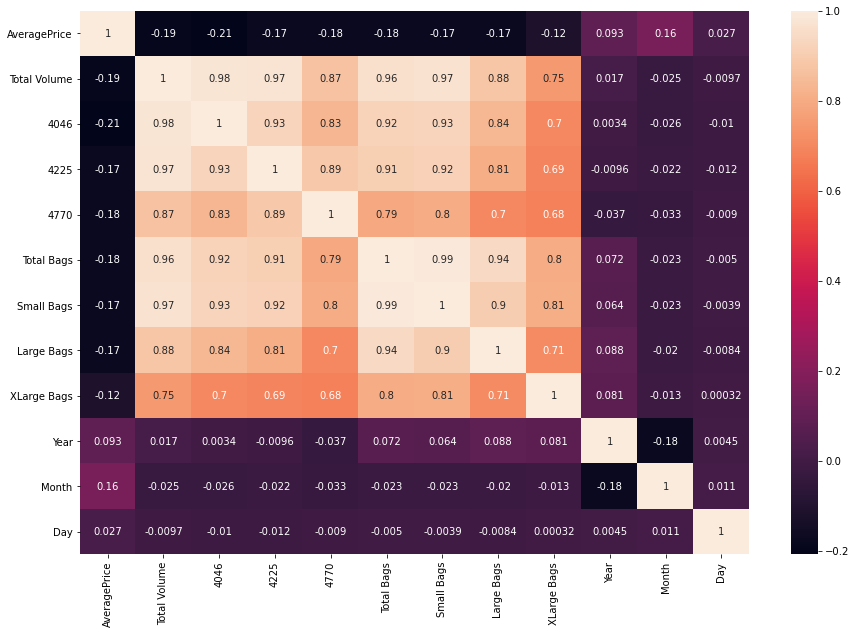

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Observation:
1.Most of the columns are positively correlated with each other.

2.4046 is correlated with 4770 at 83%,4046 is correlated with 4225 at 93%,4225 is correlated with 4770 at 89%.

3.Total bags are correlated with small bag (99%) and large bags(94) and Xlarge Bags(80%)

4.Total volume is correlated with Total bags at 96%.

5.Thus we also observe that different sizes of bags belong to the total bags and diffrent variety of avocado sold belong to total volume.So we can remove them if we want.

In [44]:
df.corr()["AveragePrice"].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
Day             0.027386
Year            0.093197
Month           0.162409
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

Thus we see that average price is correlated with Month and 
negatively correlated with Total bags,Total volume(No. of avacoda sold).So Positively correlated columns 
have contribute high to the target variable, whereas negatively correlated columns contribute less or zero 
to the target variable.

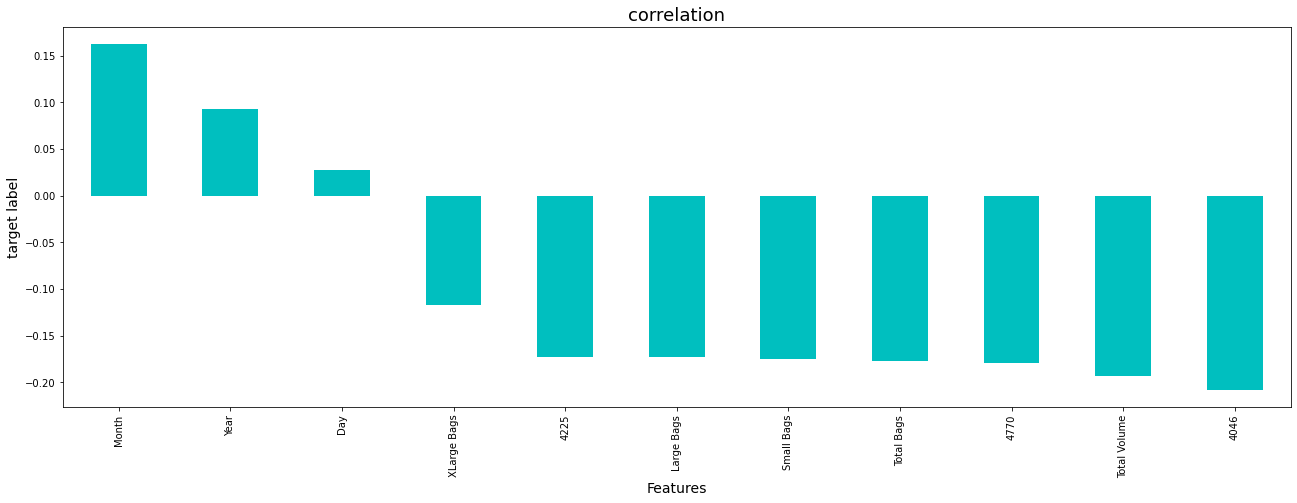

In [45]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

This visual representation of target variable positively and negatively correlated,
those which are upward are positively correlated and have impact on direct varable and those which are
facing downward are negatively correlated which have less contribution towards target variable.l

# Conversion of  categorical data into numerical data

In [46]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Taking the columns to be converted
col=['Month','Day','region','Year','type']
for i in col:
    df[i]=le.fit_transform(df[i])

In [47]:
df.head()  #validating dataset after conversion

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,11,26
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,11,19
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,11,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,11,5
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,10,28


In [48]:
df.dtypes #Checking out the datatype after conversion

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
region            int32
Year              int64
Month             int64
Day               int64
dtype: object

Thus we that categorical columns have been changed to datatype int. 

# Checking skewness

In [49]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
Year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

Thus considering the range of skewness from +/-0.5, Bags category columns, PLU category columns, Total Volume have heavy skewness in their data.

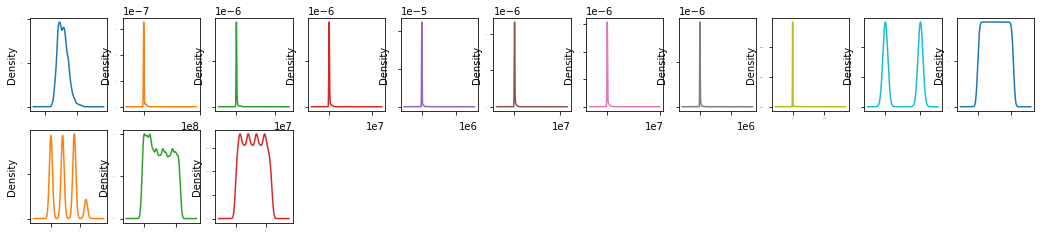

In [50]:
df.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Thus in univariate analysis,we already saw the datas'are not normally distributed ,this may be due to presence of outliers

# Checking outliers

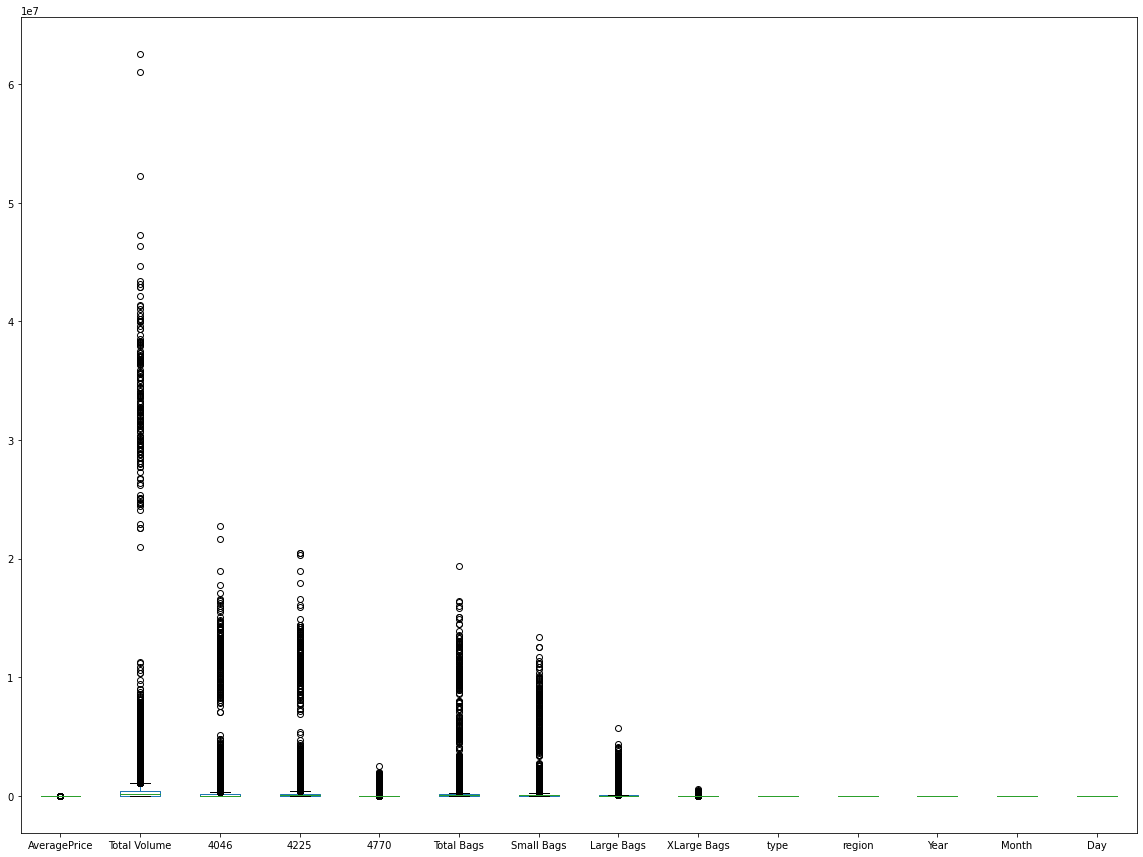

In [51]:
df.plot(kind='box',figsize=(20,15))
plt.show()

Thus we see outliers are present in the dataset,so we will be using zscore technique to remove them.Most of the outliers are present in total volume,4046,4225,4770,total bags,small bags,large bags,slarge bags 

In [52]:
#removing outliers
df.shape

(18249, 14)

In [53]:
#detecting outliers
from scipy.stats import zscore
dfzcore=np.abs(zscore(df))
print(np.where(dfzcore>3)) #those coeffiecients value  greater than 3 are displayed as outliers.

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [54]:
#Removing outliers
dfnew=df[(dfzcore<3).all(axis=1)]
dfnew

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,11,26
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,11,19
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,11,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,11,5
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,10,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,3,1,3
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,3,0,27
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,3,0,20
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,3,0,13


In [55]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", dfnew.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-dfnew.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (18249, 14)
Shape of the dataframe after removing outliers:  (17651, 14)
Percentage of data loss post outlier removal:  3.276891884486821


hus we see percentage data loss is around 3.28% which is acceptable.

In [56]:
#reassinging the changed dataframe to original dataframe
df=dfnew

# Building the model

# First considering Classification Analysis

As per the  problem statement,the dataset to be used for finding predict region by using classification analysis and 
predict the AveragePrice of the avocados  by using Regression analysis.

So now as we need to predict the region ,so we will be diving the dataset into two one is dependent variable 
region and rest are independent variable

# Splitting the dataset into dependent and independent variable 

In [57]:
df1=dfnew.drop('region',axis=1)   #Independent variables
y=dfnew['region']    #Dependent or Target Variable

In [58]:
#Checking x data
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,11,26
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,11,19
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,11,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,11,5
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,10,28


In [59]:
#Checking y data
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

# Treating skewness using log-transform

We are using the log transformation  as we saw that the distribution is mostly skewed so this is used to make it less skewed.

In [60]:
#We are removing skewness from independent variables by using log-transform
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

# Scaling the data

In [61]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df1)
x=pd.DataFrame(x,columns=df1.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month,Day
0,-0.195352,-0.061962,-0.587318,0.431565,-0.246207,-0.473426,-0.215789,-0.648254,-0.627319,-1.019047,-1.210013,1.644612,1.289309
1,-0.143510,-0.134302,-0.719464,0.359601,-0.199437,-0.431908,-0.179590,-0.636520,-0.627319,-1.019047,-1.210013,1.644612,0.491652
2,-1.232207,0.218235,-0.668997,0.683316,-0.001478,-0.504018,-0.243116,-0.621646,-0.627319,-1.019047,-1.210013,1.644612,-0.306004
3,-0.843387,0.033021,-0.560308,0.532565,-0.145897,-0.661685,-0.384129,-0.552915,-0.627319,-1.019047,-1.210013,1.644612,-1.103660
4,-0.324959,-0.167601,-0.616931,0.353051,-0.135308,-0.632653,-0.362677,-0.449388,-0.627319,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.670586,-0.378245,-0.861693,-1.215018,-0.268139,-0.046548,-0.241763,-0.627319,0.981309,1.980756,-1.180379,-1.331562
17647,0.789660,-0.765474,-0.544515,-0.569192,-1.215018,-0.443885,-0.200255,-0.317520,-0.627319,0.981309,1.980756,-1.462878,1.403260
17648,1.204402,-0.769503,-0.544458,-0.690718,0.424488,-0.437415,-0.182019,-0.855591,-0.627319,0.981309,1.980756,-1.462878,0.605603
17649,1.359930,-0.694596,-0.468195,-0.620126,0.424171,-0.365019,-0.119253,-0.812010,-0.627319,0.981309,1.980756,-1.462878,-0.192053


# Building the model

# Base model:Logistic Regression

In [62]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import accuracy_score

In [63]:
#Finding the best random state and accuracy
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 19 ,the model performs well
Training r2_score is:  7.474268759237567
Testing r2_score is:  7.5239790598843115
At random state 24 ,the model performs well
Training r2_score is:  7.485205299978592
Testing r2_score is:  7.524813263923558
At random state 37 ,the model performs well
Training r2_score is:  7.478747084395454
Testing r2_score is:  7.508335109611009
At random state 55 ,the model performs well
Training r2_score is:  7.47848753472562
Testing r2_score is:  7.485153938528
At random state 78 ,the model performs well
Training r2_score is:  7.495842760925431
Testing r2_score is:  7.545783897189063
At random state 117 ,the model performs well
Training r2_score is:  7.507821843183471
Testing r2_score is:  7.4567821492340425
At random state 207 ,the model performs well
Training r2_score is:  7.5094647409677195
Testing r2_score is:  7.47036409298688
At random state 223 ,the model performs well
Training r2_score is:  7.459657174516787
Testing r2_score is:  7.530955898690205

Thus we see at random_state=445,the model performs well as the training accuracy and testing accuracy is same.

In [64]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=445,test_size=.20)

# Finding out the best model


#Tetsing various models in one function

In [65]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()


model=[lg,gnb,svc,dtc,rf,ada]
score=[]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    AS=accuracy_score(y_test,predm)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
accuracy_score:  0.5358255451713395
[[45  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  1]
 [ 0  0 38 ...  0  0  2]
 ...
 [ 0  0  0 ... 32  1  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  2  0 ...  0  0 15]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        69
           1       0.20      0.40      0.27        60
           2       0.72      0.66      0.68        58
           3       0.65      0.43      0.51        61
           4       0.50      0.45      0.48        75
           5       0.42      0.45      0.44        60
           6       0.89      0.81      0.85        72
           7       0.61      0.69      0.65        67
           8       0.76      0.78      0.77        79
           9       0.47      0.73      0.57        67
          10       0.56      0.54      0.55        82
          11       0.65      0.68      0.66        68
          12       0.57      0.52      0.55        63
        

Accuracy score of DecisionTreeClassifier() is:
accuracy_score:  0.7989238176154064
[[57  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 54 ...  0  0  1]
 ...
 [ 0  0  0 ... 33  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  2  1 ...  0  0 41]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        69
           1       0.66      0.80      0.72        60
           2       0.87      0.93      0.90        58
           3       0.80      0.77      0.78        61
           4       0.91      0.84      0.87        75
           5       0.66      0.78      0.72        60
           6       0.94      0.92      0.93        72
           7       0.74      0.79      0.76        67
           8       0.96      0.94      0.95        79
           9       0.79      0.78      0.78        67
          10       0.70      0.51      0.59        82
          11       0.92      0.88      0.90        68
          12       0.82      0.87      0.85        63
    

Thus we see,
1.The accuracy score of Decision tree classifier is 80%. 

2.The accuracy score of Random Forest Classifier is 91% .

3.The accuracy score of GaussianNB is 7.75%

The accuracy score of AdaBoost is 8.49% .

The accuracy score of Support vector classifier is 80%.

The base model(logistic regression) accuracy score is 54%.

Conclusion: We see that Random Forest Classifier is producing good accuracy.

Now we will check cross validation technoque for overfitting.

Conclusion: We see that Random Forest Classifier is producing good accuracy.

Now we will check cross validation technoque for overfitting.

# CROSS VALIDATION

In [66]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lg,x,y,cv=5)
print("The cross validation score of Logistic Regression model is :",scr.mean())

The cross validation score of Logistic Regression model is : 0.39686434116923114


The cross validation score of Logistic Regression model is : 0.39686434116923114


In [67]:
scr=cross_val_score(gnb,x,y,cv=5)
print("The cross validation score of GuassianNV is :",scr.mean())

The cross validation score of GuassianNV is : 0.04617376005160285


The cross validation score of GuassianNV is : 0.04617376005160285

In [68]:
scr=cross_val_score(svc,x,y,cv=5)
print("The cross validation score of Support Vector Classifier is :",scr.mean())

The cross validation score of Support Vector Classifier is : 0.5837050871961252


The cross validation score of Support Vector Classifier is : 0.5837050871961252

In [69]:
scr=cross_val_score(dtc,x,y,cv=5)
print("The cross validation score of Decision Tree classifier is :",scr.mean())

The cross validation score of Decision Tree classifier is : 0.534591746273195


The cross validation score of Decision Tree classifier is : 0.5388401555466235

In [70]:
scr=cross_val_score(rf,x,y,cv=5)
print("The cross validation score of Random Forest Classifier is :",scr.mean())

The cross validation score of Random Forest Classifier is : 0.6708989500522687


The cross validation score of Random Forest Classifier is : 0.6730521652414109

In [71]:
scr=cross_val_score(ada,x,y,cv=5)
print("The cross validation score of AdaBoost Classifier is :",scr.mean())

The cross validation score of AdaBoost Classifier is : 0.05937449205459054


The cross validation score of AdaBoost Classifier is : 0.06152746655883984

The cross validation score of Random Forest Classifier is :67.30% 
Thus we see that Random Forest classifier is performing better compare to other model, we will continue with Random Forest Model.

# Hyper parameter tuning

In [86]:
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in gridsearchcv
parameters= {'max_depth':[2,5],
    'min_samples_leaf':[2,4],
    'n_estimators':[100,150],
    'min_samples_split': [2,5],
    }

rf=RandomForestClassifier(random_state=455)
GCV=GridSearchCV(rf,parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
print(GCV.best_params_)#Printing the best parameters obtained
print(GCV.best_score_) #Mean cross-validated score of best_estimator

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
0.4970254957507082


In [ ]:
The best parameters are max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}

In [88]:
#fitting the best parameters
rf=RandomForestClassifier(max_depth=5, min_samples_leaf= 2, min_samples_split=5, n_estimators=150)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  50.89209855564996
Cross validation score:  26.269942548516056


After using Hyperparameter tuning, RandomForest Classifier  gives an accuracy score of 51% and cross validation score of 26.26% considering that the fact that it has reduced the biasesness/overfittedness.We finalize this model as our best model.

# MODEL SAVING

In [94]:
#saving the Random forest Model with hypertuning best parameters
import pickle
filename='avocadofinal.pkl'
pickle.dump(rf,open(filename,'wb'))

# CONCLUSION:

In [95]:
loaded_model=pickle.load(open('avocadofinal.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) #getting 51% score

50.89209855564996


In [96]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({"original":a,"Predicted":predicted},index=range(len(a)))
df_com

,original,Predicted
0,10,7
1,45,52
2,30,30
3,33,33
4,27,31
...,...,...
3526,36,41
3527,43,43
3528,30,30
3529,40,40


# Regression Analysis

Spliting independent and dependent variables to perform further analysis

In [102]:
df1=dfnew.drop('AveragePrice',axis=1)   #Independent variables
y=dfnew['AveragePrice']    #Dependent or Target Variable

In [103]:
#Checking x data
df1.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0,11,26
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0,11,19
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0,11,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0,11,5
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,10,28


In [104]:
#Checking y data
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

# Applying log-transform to treating skewness

In [105]:
#We are removing skewness from independent variables by using log-transform
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

# Scaling the data

In [106]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df1)
x=pd.DataFrame(x,columns=df1.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,-0.061962,-0.587318,0.431565,-0.246207,-0.473426,-0.215789,-0.648254,-0.627319,-1.019047,-1.695495,-1.210013,1.644612,1.289309
1,-0.134302,-0.719464,0.359601,-0.199437,-0.431908,-0.179590,-0.636520,-0.627319,-1.019047,-1.695495,-1.210013,1.644612,0.491652
2,0.218235,-0.668997,0.683316,-0.001478,-0.504018,-0.243116,-0.621646,-0.627319,-1.019047,-1.695495,-1.210013,1.644612,-0.306004
3,0.033021,-0.560308,0.532565,-0.145897,-0.661685,-0.384129,-0.552915,-0.627319,-1.019047,-1.695495,-1.210013,1.644612,-1.103660
4,-0.167601,-0.616931,0.353051,-0.135308,-0.632653,-0.362677,-0.449388,-0.627319,-1.019047,-1.695495,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.670586,-0.378245,-0.861693,-1.215018,-0.268139,-0.046548,-0.241763,-0.627319,0.981309,1.747054,1.980756,-1.180379,-1.331562
17647,-0.765474,-0.544515,-0.569192,-1.215018,-0.443885,-0.200255,-0.317520,-0.627319,0.981309,1.747054,1.980756,-1.462878,1.403260
17648,-0.769503,-0.544458,-0.690718,0.424488,-0.437415,-0.182019,-0.855591,-0.627319,0.981309,1.747054,1.980756,-1.462878,0.605603
17649,-0.694596,-0.468195,-0.620126,0.424171,-0.365019,-0.119253,-0.812010,-0.627319,0.981309,1.747054,1.980756,-1.462878,-0.192053


Scaling data so that all the data should be scaled and should be  in same format.

# Building the model

Finding best random state for building Regression Model

In [107]:
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [108]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5745382911301019 on Random State 833


Best r2 score is 0.5745382911301019 on Random State 833

# Base Model:Linear Regression

Creating the training and testing data sets

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=833) #taking the best random state from above

In [110]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([-0.20702209,  0.00472771,  0.20603147,  0.03273734, -0.19625076,
        0.13382776, -0.05123441,  0.01666663,  0.18533772,  0.01382668,
        0.08932892,  0.07527224,  0.00828681])

In [111]:
lr.intercept_

1.405386199161578

In [112]:
#training the model
lr.score(x_train,y_train)

0.5458835346935227

In [113]:
#predicting train
pred_train=lr.predict(x_train)
pred_train

array([1.02093867, 1.28176244, 1.0163101 , ..., 1.07838874, 1.29827648,
       1.02849388])

In [114]:
#predicting y_test
pred_test=lr.predict(x_test)
pred_test

array([1.11286125, 1.26087209, 1.37909115, ..., 1.50053559, 1.08900607,
       1.50821019])

In [115]:
#creating dataframe of the predicted value
preddf=pd.DataFrame(data=pred_test)
preddf

,0
0,1.112861
1,1.260872
2,1.379091
3,1.686619
4,1.484835
...,...
5820,1.235597
5821,1.613531
5822,1.500536
5823,1.089006


In [116]:
#testing the model
lr.score(x_test,y_test)

0.5666900381217703

In [117]:
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error :",mean_squared_error(y_test,pred_test))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,pred_test)))
print("R2_Score",r2_score(y_test,pred_test))

Mean absolute error : 0.2036973676539296
Mean squared error : 0.06564623826863684
Root mean error : 0.25621521865150176
R2_Score 0.5666900381217703


# cross_validation of the model

In [119]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold :",j)
    print("The CV score is :",cv_mean)
    print("The accuracy score for training :",Train_accuracy)
    print("The accuracy score for testing :",Test_accuracy)
    print("\n")

At cross fold : 2
The CV score is : -2.5987239991101783
The accuracy score for training : 0.5458835346935227
The accuracy score for testing : 0.5666900381217703


At cross fold : 3
The CV score is : 0.17698599377269386
The accuracy score for training : 0.5458835346935227
The accuracy score for testing : 0.5666900381217703


At cross fold : 4
The CV score is : 0.12372135758610989
The accuracy score for training : 0.5458835346935227
The accuracy score for testing : 0.5666900381217703


At cross fold : 5
The CV score is : 0.19943066009730653
The accuracy score for training : 0.5458835346935227
The accuracy score for testing : 0.5666900381217703


At cross fold : 6
The CV score is : 0.10957807767988374
The accuracy score for training : 0.5458835346935227
The accuracy score for testing : 0.5666900381217703


At cross fold : 7
The CV score is : 0.1333664524594328
The accuracy score for training : 0.5458835346935227
The accuracy score for testing : 0.5666900381217703


At cross fold : 8
The C

We see that cross validation score is 19% at cv=5 is better compare to others cv and the training and testing are likely equal.

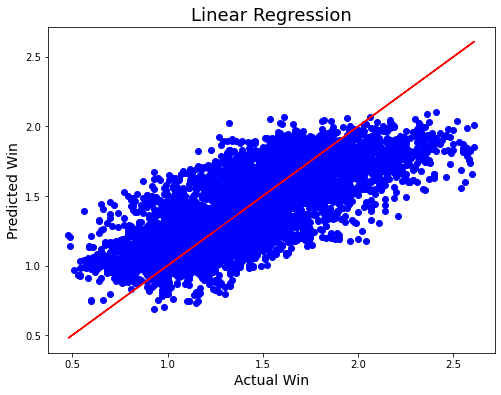

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Win",fontsize=14)
plt.ylabel("Predicted Win",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints ,we can improve more by regularization and 
hyperparameter technique. There are some datapoint far away from best fit line,which can increasae the mse error
so we need to regularise and improve the r2_score.

# REGULARIZATION

In [121]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [127]:
rdg=Ridge(alpha=0.001,random_state=833)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.5458835346933809

In [126]:
#Lasso model training
ls=Lasso(alpha= 0.1, random_state= 833)
ls.fit(x_train,y_train)   
ls_score_training=ls.score(x_train,y_train) 
pred_ls=ls.predict(x_test) 
ls_score_training*100   

32.2314598468793

In [128]:
predict=rdg.predict(x_test)

In [129]:
r2_score(y_test,predict)

0.566690020661176

In [130]:
lso=Lasso(alpha=0.0001,random_state=833)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.5458760134570081

In [131]:
predict1=lso.predict(x_test)

In [132]:
r2_score(y_test,predict1)

0.5665459387531165

# Modeling without tuning

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error 

In [134]:
rfr = RandomForestRegressor(random_state=833)
dtr = tree.DecisionTreeRegressor(random_state=833)
xg = XGBRegressor(random_state=833)
svr=SVR()
knnr = KNeighborsRegressor()
lr = LinearRegression()
lsr = linear_model.Lasso(random_state = 833)
rr = linear_model.Ridge(random_state=833)
ada= AdaBoostRegressor()
gdb=GradientBoostingRegressor()

models=[lr,lsr,rr,svr,rfr,ada,gdb,dtr,knnr,xg]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
adjR2_train=[]
adjR2_test=[]
mape=[]

k = len(x_test)
n = len(y)

for i in models:  
    i.fit(x_train,y_train)
    r2_train = round(i.score(x_train, y_train),3)
    r2_test = round(i.score(x_test, y_test),3)
    scores_train.append(round(r2_train,3))
    scores_test.append(round(r2_test,3))
    y_pred = i.predict(x_test)
    mape.append(round(mean_absolute_percentage_error(y_test, y_pred)*100,3))
    rmse_train.append(round(np.sqrt(mean_squared_error(y_train,i.predict(x_train))),3))
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test,i.predict(x_test))),3))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Train R2': scores_train,'Test R2': scores_test, 'MAPE':mape},
            index=['Linear Regression','Lasso Regression','SVR Regression','AdaBoost Regression','GradientBoosting Regression','Ridge Regression','Random Forest Regression','Decision Tree Regression', 'KNN Regression','XGB Regression']))

                             Train RMSE  Test RMSE  Train R2  Test R2    MAPE
Linear Regression                 0.259      0.256     0.546    0.567  15.691
Lasso Regression                  0.384      0.389     0.000   -0.000  25.245
SVR Regression                    0.259      0.256     0.546    0.567  15.691
AdaBoost Regression               0.171      0.178     0.801    0.792   9.902
GradientBoosting Regression       0.051      0.135     0.982    0.879   7.096
Ridge Regression                  0.255      0.256     0.561    0.567  16.919
Random Forest Regression          0.189      0.193     0.758    0.755  11.183
Decision Tree Regression          0.000      0.193     1.000    0.755   9.338
KNN Regression                    0.142      0.173     0.864    0.802   9.709
XGB Regression                    0.073      0.126     0.964    0.896   6.764


Observation: 
For Linear Models, the MAPE(Mean absolute percentage error) states that the predicted values are ~15-25% away from actuals.

For Non-Linear Models / ensemble models, Decision Tree models overfits. GradientBoosting Regressor and XGB Regresssion 
are the best model among non-linear models,with approx lowest RMSE score and MAPE. XGB is having lowest MAPE(6.7%) with low test_rmse 0.126 and high test r2 score of 89%, 
So we will taking  XGB regression and Gradient boosting for hyperparameter tuning through gridsearchcv 
which are best models compare from others.

RMSE indicates the absolute fit of the model or spread out of residual.
R2 indicates proportion of variance for a dependent variable that is explained by independent variables.
Both RMSE and R2 are relative measure of fit. 
MAPE indicates to what extent predicated values are away from actual.

# HYPERPARAMETER TUNING THROUGH GRIDSEARCHCV

So now we are going to fine-tune the hyperparameters using GridSearchCV on XGB model which is our best model compare to others. 
GridSearchCV automatically tunes the hyperparameters with the parameters specified to find the best parameters 
and the best estimator, this helps us from manually having to tune,which would take a lot of time.

In [143]:
from xgboost import XGBRegressor
parameters = {'n_estimators' : [100, 150, 200],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }
xgbr=XGBRegressor()
GCV=GridSearchCV(xgbr,parameters)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 100, 'n_jobs': -2}


gamma': 2.0, 'max_depth': 8, 'n_estimators': 100, 'n_jobs': -2}

In [144]:
xgbr=XGBRegressor(gamma= 2.0, max_depth=8 ,n_estimators= 100, n_jobs= -2)
xgbr.fit(x_train,y_train)
xgbr.score(x_train,y_train)
pred_decision=xgbr.predict(x_test)

xgbs=r2_score(y_test,pred_decision)
print('R2 Score',xgbs*100)

xgbscore=cross_val_score(xgbr,x,y,cv=5)
xgbc=xgbscore.mean()
print('Cross Val Score:',xgbc*100)

R2 Score 89.58021402953142
Cross Val Score: 41.31092399160213


We find that XGBregressor the model accuracy and cross validatiin after hyperparametr tuning yield 89% and 41% respectively
which shows our model is performing good but not that well. Thus this model is able to predict well average price of avocado generated 
from different regions.

In [150]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={ 'loss':['squared_error','absolute_error'],
              'learning_rate':[0.1,0.01,0.001,1],
              'n_estimators':[2,5,10],
               'criterion':['mae','mse'],      
            }

gbr=GradientBoostingRegressor()
GCV=GridSearchCV(gbr,parameters)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'criterion': 'mse', 'learning_rate': 1, 'loss': 'squared_error', 'n_estimators': 10}


best parameters are :'criterion': 'mse', 'learning_rate': 1, 'loss': 'squared_error', 'n_estimators': 10}

In [152]:
gbr=GradientBoostingRegressor(learning_rate= 1, loss= 'squared_error',n_estimators= 10, criterion= 'mse')
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_decision=gbr.predict(x_test)

gbs=r2_score(y_test,pred_decision)
print('R2 Score',gbs*100)

gbscore=cross_val_score(gbr,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

R2 Score 71.25807761865144
Cross Val Score: 14.228753215748208


R2 Score 71.25807761865144
Cross Val Score: 14.228753215748208

Thus we see both Gradient Boosting regressor and XGB regressor after doing 
hyperparameter tuning R2 score has decresed to 71% from 87.9%  and cross validation score is 14% in case of Gradient Boosting whereas R2 score is remaining constant 89.6% and cross validationscore is 41% in case of XGB Regressor and far  better than gradient boosting.There is a large gap in R2 score and cross validation score in Gradient boosting whereas in XGB ,the gap is little less but still there is gap.Considering the above analyisi,we choosing XGB our suitable and best model.  

# Saving the model :XGB Regressor :Best Model

In [146]:
import pickle
filename='avocadofinal.pkl'
pickle.dump(xgbr,open(filename,'wb'))

# Conclusion :Prediction Test

In [147]:
loaded_model=pickle.load(open('avocadofinal.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

89.58021402953142


# Prediction Result

In [148]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,5575,5576,5577,5578,5579,5580,5581,5582,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599,5600,5601,5602,5603,5604,5605,5606,5607,5608,5609,5610,5611,5612,5613,5614,5615,5616,5617,5618,5619,5620,5621,5622,5623,5624,5625,5626,5627,5628,5629,5630,5631,5632,5633,5634,5635,5636,5637,5638,5639,5640,5641,5642,5643,5644,5645,5646,5647,5648,5649,5650,5651,5652,5653,5654,5655,5656,5657,5658,5659,5660,5661,5662,5663,5664,5665,5666,5667,5668,5669,5670,5671,5672,5673,5674,5675,5676,5677,5678,5679,5680,5681,5682,5683,5684,5685,5686,5687,5688,5689,5690,5691,5692,5693,5694,5695,5696,5697,5698,5699,5700,5701,5702,5703,5704,5705,5706,5707,5708,5709,5710,5711,5712,5713,5714,5715,5716,5717,5718,5719,5720,5721,5722,5723,5724,5725,5726,5727,5728,5729,5730,5731,5732,5733,5734,5735,5736,5737,5738,5739,5740,5741,5742,5743,5744,5745,5746,5747,5748,5749,5750,5751,5752,5753,5754,5755,5756,5757,5758,5759,5760,5761,5762,5763,5764,5765,5766,5767,5768,5769,5770,5771,5772,5773,5774,5775,5776,5777,5778,5779,5780,5781,5782,5783,5784,5785,5786,5787,5788,5789,5790,5791,5792,5793,5794,5795,5796,5797,5798,5799,5800,5801,5802,5803,5804,5805,5806,5807,5808,5809,5810,5811,5812,5813,5814,5815,5816,5817,5818,5819,5820,5821,5822,5823,5824
Predicted,1.169331,1.254135,1.229978,1.629805,1.428577,1.446669,0.977281,1.041559,1.362928,1.587365,1.220479,1.147675,0.942492,1.319826,1.741322,1.118701,1.460459,1.403484,1.331262,1.173217,1.842755,1.379060,1.445946,1.116263,1.646638,0.961637,1.913368,1.737278,1.508457,1.296953,1.061841,1.368213,2.026890,1.985278,1.560168,1.600697,1.228835,1.280355,1.289903,0.933394,1.168087,1.566424,1.726405,1.349975,1.037578,1.535110,1.056623,1.850164,1.712133,1.998531,1.282740,1.082084,1.300892,1.279037,1.021564,2.404919,1.261002,1.250292,1.14056,1.528815,1.214842,1.605376,1.542088,1.15728,0.620054,1.749339,1.631699,1.552644,1.893993,1.38249,1.802648,0.959731,1.313945,2.235204,0.639090,1.273941,1.032211,1.659938,2.106113,1.884803,2.236753,1.761173,1.484641,1.019582,1.311361,0.794208,2.429365,0.817871,1.291610,1.971543,1.309146,1.611496,0.751799,1.458864,2.129557,1.501731,1.183457,1.101545,1.614904,1.318444,1.765724,1.746100,0.888114,1.561806,1.064616,0.763365,1.602032,1.263897,1.824540,1.987909,1.500251,1.047309,1.444453,2.003788,0.990420,1.349954,1.212206,1.139485,1.46092,1.275654,1.409003,1.471587,1.108999,1.279227,1.017400,1.562148,1.879066,0.929944,1.344550,1.455842,1.848307,1.440816,1.904572,1.143739,1.572814,1.370738,0.796317,1.079546,1.163361,1.251935,0.741233,1.125989,1.710282,1.697389,1.825626,1.750463,2.186329,1.321521,1.298615,1.523494,1.517122,1.468582,1.633200,1.568163,1.330259,2.361628,2.381087,1.579105,1.898746,1.259406,1.644223,1.054926,0.989194,1.300904,1.543565,1.273219,1.731218,1.655601,0.757451,1.714088,1.661318,1.274782,1.601743,1.384055,0.949513,1.169435,1.389011,1.432176,0.950823,1.514972,1.092123,1.261486,0.811566,0.917189,0.946388,1.597273,1.121665,1.499475,1.039629,1.558498,1.164905,1.464125,0.911992,0.963297,2.048842,1.438050,1.576119,1.366864,1.880144,1.037040,2.423910,1.997257,1.477843,1.302657,1.124989,1.48